In [1]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
from dateutil import parser
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Multiple Linear Regression

In [2]:
df_boston=pd.read_pickle("df_boston.pkl")

Now we are plotting the data with demand and tempreture as axis to get general information about our feature set

<AxesSubplot:xlabel='mean_temp', ylabel='count'>

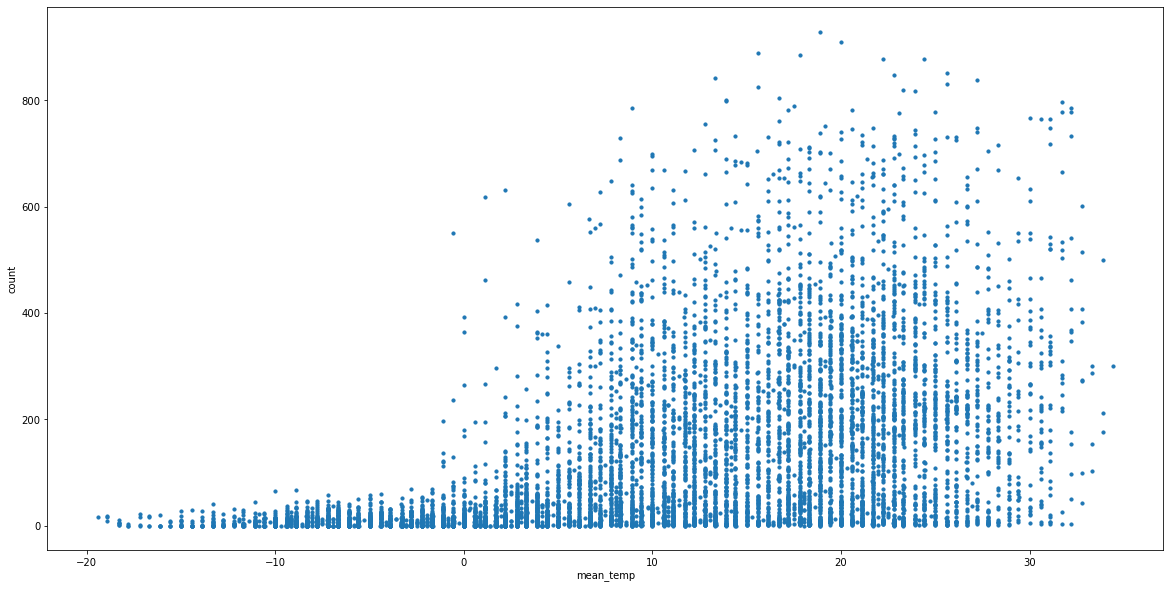

In [3]:
df_boston.plot.scatter(x = 'mean_temp', y = 'count', s = 10,figsize=(20,10))

<AxesSubplot:xlabel='mean_temp', ylabel='count'>

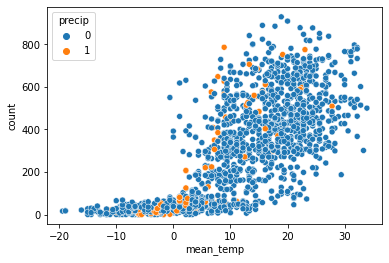

In [4]:
sns.scatterplot(data=df_boston[(df_boston["rushhour"]==1) & (df_boston["weekday"]==1)], x='mean_temp', y='count', hue='precip')

Creating new column in which each month is displayed as season. Starting with spring for #1 and ending with winter #4 .

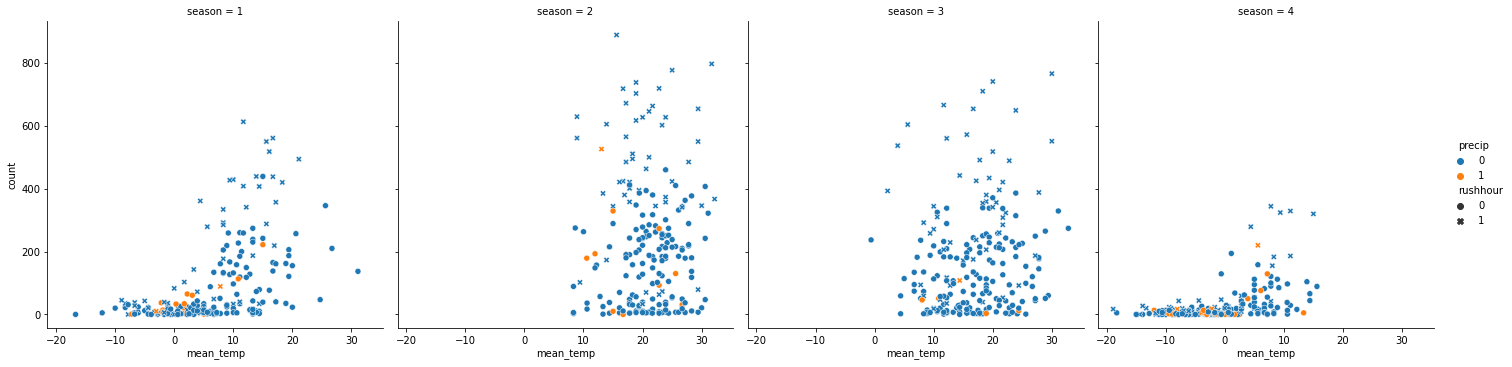

In [5]:
df_boston["season"]=df_boston["start_time"].apply(lambda x: 4 if x.month==12 or x.month==1 or x.month==2 else 
                                                      1 if x.month==3 or x.month==4 or x.month==5 else 
                                                      2 if x.month==6 or x.month==7 or x.month==8 else 3)
sns.relplot(x="mean_temp", y="count", hue="precip",
            col="season",style="rushhour", data=df_boston[::10])

Getting general information about our Dataset. As you can see there are more bikes beening rented in warmer months of the year than in the colder ones.

Season 1: Spring

Season 2: Summer

Season 3: Autumn

Season 4: Winter


In [6]:
def start_plot(iters, df):
    x_nor = df["mean_temp"].copy()
    y_nor = df["count"].copy()
    return plot_fit(gradient_descent(iters, df,x_nor,y_nor), x_nor=x_nor,y_nor= y_nor)

def gradient_descent(iters, df,x_nor,y_nor):
    theta = np.array([0., 0.])
    alpha = 1.0
    
    for t in range(iters):
        theta[0] -= alpha/len(df) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
        theta[1] -= alpha/len(df) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
    return theta

def plot_fit(theta, x_nor, y_nor):
    Error = sum((theta[0]*x_nor + theta[1] - y_nor)**2) # simple least squares error, which underlies our OLS example
    
    # compute partial derivative (i.e. gradient) for theta 1 and 2
    def_theta1 = sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
    def_theta2 = sum((theta[0] * x_nor + theta[1] - y_nor))
    
    # plot
    
    plt.figure(figsize = (8,6))
    plt.scatter(x_nor, y_nor, marker = 'x')
    plt.xlabel("Nomalized Temperature")
    plt.ylabel("Normalized Demand")
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim)
    print('Theta = ', theta, 'Error = ',Error,'def_theta1 = ',def_theta1, 'def_theta2 = ', def_theta2 )

In [7]:
df_test=df_boston[::50]
df_test=df_test[df_test["rushhour"]==1]

In [8]:
#rescalling df_test
x_re=(df_test["mean_temp"]-min(df_test["mean_temp"]))/(max(df_test["mean_temp"])-min(df_test["mean_temp"]))
y_re=(df_test["count"]-min(df_test["count"]))/(max(df_test["count"])-min(df_test["count"]))
df_test_re=df_test.copy()
df_test_re["mean_temp"]=x_re
df_test_re["count"]=y_re

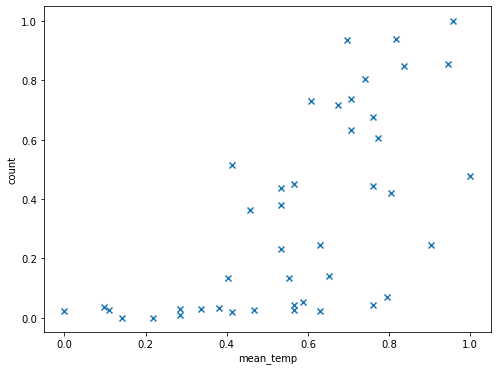

In [9]:
fig, ax= plt.subplots(figsize= (8,6))

ax.scatter(df_test_re["mean_temp"], df_test_re["count"], marker="x")
ax.set_xlabel("mean_temp")
ax.set_ylabel("count")
plt.show()

Too prove our point, here is a plot displaying the yearly average demand during rushhour with the temperature on the x-axis.

Theta =  [ 0.79912176 -0.12242543] Error =  2.6041289126753417 def_theta1 =  -0.3007706948027038 def_theta2 =  -0.18934041297583656


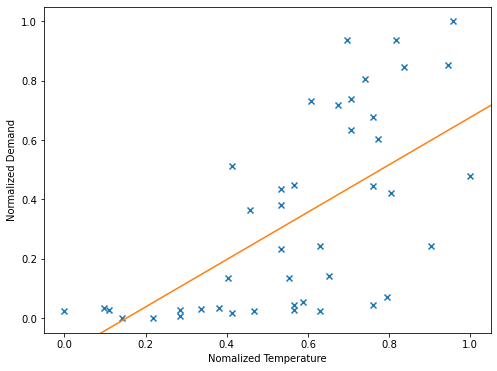

In [10]:
start_plot(10, df_test_re)

As you can see, more bikes are beeing rented during rushhours when its also warmer.

In [11]:
#Rescaling our data
x_re=(df_boston["mean_temp"]-min(df_boston["mean_temp"]))/(max(df_boston["mean_temp"])-min(df_boston["mean_temp"]))
y_re=(df_boston["count"]-min(df_boston["count"]))/(max(df_boston["count"])-min(df_boston["count"]))
df_boston_re=df_boston.copy()
df_boston_re["mean_temp"]=x_re
df_boston_re["count"]=y_re
df_boston_re

,start_time,count,mean_temp,precip,spring,summer,autumn,winter,rushhour,weekday,season,hour
6,2015-01-01 06:00:00,0.000000,0.256506,0,0,0,0,1,0,1,4,6
7,2015-01-01 07:00:00,0.000000,0.256506,0,0,0,0,1,1,1,4,7
8,2015-01-01 08:00:00,0.004306,0.256506,0,0,0,0,1,1,1,4,8
9,2015-01-01 09:00:00,0.002153,0.278810,0,0,0,0,1,1,1,4,9
10,2015-01-01 10:00:00,0.008611,0.256506,0,0,0,0,1,0,1,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2015-12-31 19:00:00,0.027987,0.578067,0,0,0,0,1,0,1,4,19
8756,2015-12-31 20:00:00,0.010764,0.566914,0,0,0,0,1,0,1,4,20
8757,2015-12-31 21:00:00,0.023681,0.557621,0,0,0,0,1,0,1,4,21
8758,2015-12-31 22:00:00,0.019376,0.546468,0,0,0,0,1,0,1,4,22


<AxesSubplot:xlabel='mean_temp', ylabel='count'>

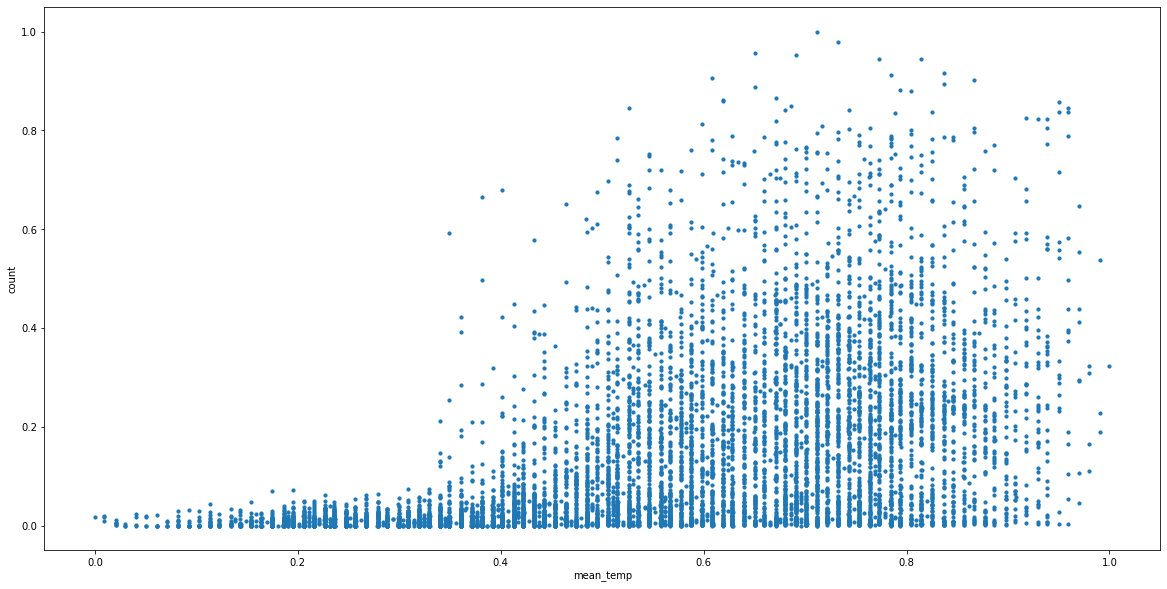

In [12]:
df_boston_re.plot.scatter(x = 'mean_temp', y = 'count', s = 10,figsize=(20,10))

In generall you can say that there is more traffic when its warmer even if there is no rushhour. In the following we will show the linear regression on the whole rescaled dataset.

To make it more suitable and reduce overploting we will shorten our the dataset.

Theta =  [ 0.33488696 -0.05158377] Error =  21.034301781777696 def_theta1 =  -3.961219233943211 def_theta2 =  -2.389004086901851


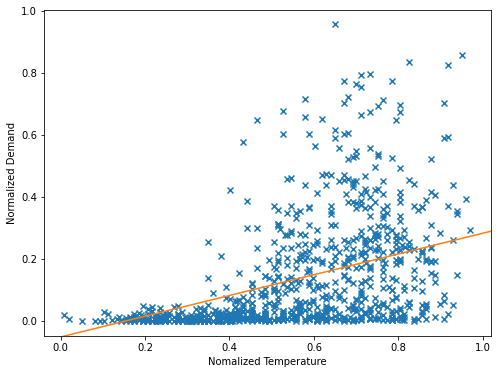

In [13]:
start_plot(10, df_boston_re[::10])

As displayed the model is increasing when the temperature rises.

Now we will creat a functions, which will allow us to display various plots with diffrent feature sets.  

In [14]:
#this funktion allows us to make one plot with a multi-linear-regression
def plot_ml_regression(df, condition):
    #creation of the train and test set
    train, test = train_test_split(df, test_size=0.3)
    
    X = train[["mean_temp", condition]]
    y = train[["count"]]
    X_test=test[["mean_temp", condition, "count"]]
    
    #making the linear model
    lin_mod_day = LinearRegression()
    lin_mod_day.fit(X,y)
    print(lin_mod_day.coef_, lin_mod_day.intercept_)
    
    #sorting the condition
    X_condition_1 = X_test[X_test[condition]==1]
    X_condition_2 = X_test[X_test[condition]==0]
    y_test_1 = X_test[X_test[condition]==1]["count"]
    y_test_2 = X_test[X_test[condition]==0]["count"]
    
    X_condition_1.drop(['count'], axis='columns', inplace=True)
    X_condition_2.drop(['count'], axis='columns', inplace=True)
    
    #predict on condition seperately 
    y_pred_condition_1= lin_mod_day.predict(X_condition_1)
    y_pred_condition_2 = lin_mod_day.predict(X_condition_2)
    
    #displaying the error of our predition
    print('Mean absolute error for factor '+ condition+' True: %.2f'
      % mean_absolute_error(y_test_1, y_pred_condition_1))
    print('Mean absolute error for factor '+ condition+' False: %.2f'
      % mean_absolute_error(y_test_2, y_pred_condition_2))
    
    plt.figure(figsize = (8,6))

    plt.scatter(X_condition_1["mean_temp"], 
                test[test[condition]==1]["count"], 
                marker="+", color="blue",label=condition+" True") 

    plt.scatter(X_condition_2["mean_temp"], 
                test[test[condition]==0]["count"], 
                marker="x", color="orange",label=condition+" False")

    plt.plot(X_condition_1["mean_temp"], 
             y_pred_condition_1, 
             label=condition+" Prediction",color="b")
    
    plt.plot(X_condition_2["mean_temp"], 
             y_pred_condition_2, 
             label="not "+condition+" Prediction", color="r")

    plt.xlabel("Mean Temperature rescaled")
    plt.ylabel("Count rented bikes rescaled")
     
    plt.legend()
    plt.show()

[[0.41510525 0.17452441]] [-0.13804331]
Mean absolute error for factor rushhour True: 0.16
Mean absolute error for factor rushhour False: 0.08


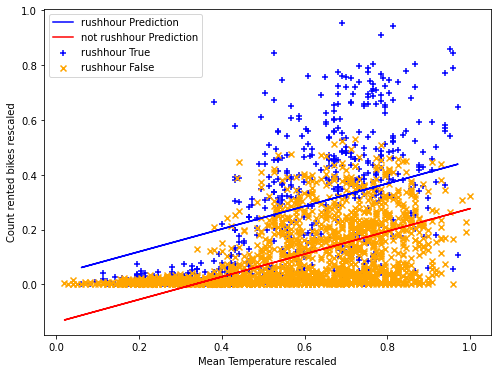

In [15]:
plot_ml_regression(df_boston_re,"rushhour")

As you can see the plot is really clusterd and not well readable. The information is also not that usefull to us ,because these 4 lines represent just the plot_ml_regression function with 2 diffrent categories combined in one plot.

In [16]:
def plot_ml_regression_v2(df1, df2, condition, info):
    train, test = train_test_split(df1, test_size=0.2)
    X = train[["mean_temp", condition]]
    y = train[["count"]]
    X_test=test[["mean_temp", condition, "count"]]
    
    lin_mod_day = LinearRegression()
    lin_mod_day.fit(X,y)
    print(lin_mod_day.coef_, lin_mod_day.intercept_)
    X_condition_1 = X_test[X_test[condition]==1]
    X_condition_2 = X_test[X_test[condition]==0]
    y_test_1 = X_test[X_test[condition]==1]["count"]
    y_test_2 = X_test[X_test[condition]==0]["count"]
    
    X_condition_1.drop(['count'], axis='columns', inplace=True)
    X_condition_2.drop(['count'], axis='columns', inplace=True)
    
    # predict weekends and weekdays seperately
    y_pred_condition_1= lin_mod_day.predict(X_condition_1)
    y_pred_condition_2 = lin_mod_day.predict(X_condition_2)
    
    print('Mean absolute error for factor '+ condition+ " True + "+ info +' True: %.2f'
      % mean_absolute_error(y_test_1, y_pred_condition_1))
    print('Mean absolute error for factor '+ condition+ " False + "+ info +' True: %.2f'
      % mean_absolute_error(y_test_2, y_pred_condition_2))
    
    plt.figure(figsize = (8,6))

    plt.scatter(X_condition_1["mean_temp"], 
                test[test[condition]==1]["count"], 
                marker="+", color="blue",label=condition+" True") 

    plt.scatter(X_condition_2["mean_temp"], 
                test[test[condition]==0]["count"], 
                marker="x", color="orange",label=condition+" False")

    plt.plot(X_condition_1["mean_temp"], 
             y_pred_condition_1, 
             label=condition+" prediction with "+ info,color="b")
    
    plt.plot(X_condition_2["mean_temp"], 
             y_pred_condition_2, 
             label="no "+condition+" prediction with "+ info, color="r")

    
    #Creation of the second Regression
    
    train, test = train_test_split(df2, test_size=0.2)
    X = train[["mean_temp", condition]]
    y = train[["count"]]
    X_test=test[["mean_temp", condition, "count"]]
    
    lin_mod_day = LinearRegression()
    lin_mod_day.fit(X,y)
    print(lin_mod_day.coef_, lin_mod_day.intercept_)
    X_condition_1 = X_test[X_test[condition]==1]
    X_condition_2 = X_test[X_test[condition]==0]
    y_test_1 = X_test[X_test[condition]==1]["count"]
    y_test_2 = X_test[X_test[condition]==0]["count"]
    
    X_condition_1.drop(['count'], axis='columns', inplace=True)
    X_condition_2.drop(['count'], axis='columns', inplace=True)
    
    # predict weekends and weekdays seperately
    y_pred_condition_1= lin_mod_day.predict(X_condition_1)
    y_pred_condition_2 = lin_mod_day.predict(X_condition_2)
    
    print('Mean absolute error for factor '+ condition+ " True + "+ info +' False: %.2f'
      % mean_absolute_error(y_test_1, y_pred_condition_1))
    print('Mean absolute error for factor '+ condition+" False + "+ info +' False: %.2f'
      % mean_absolute_error(y_test_2, y_pred_condition_2))
    

    plt.scatter(X_condition_1["mean_temp"], 
                test[test[condition]==1]["count"], 
                marker="+", color="blue") 

    plt.scatter(X_condition_2["mean_temp"], 
                test[test[condition]==0]["count"], 
                marker="x", color="orange")

    plt.plot(X_condition_1["mean_temp"], 
             y_pred_condition_1, 
             label=condition+" prediction without "+info,color="purple")
    
    plt.plot(X_condition_2["mean_temp"], 
             y_pred_condition_2, 
             label="no"+condition+" prediction without "+info, color="black")

    
    plt.xlabel("Mean Temperature rescaled")
    plt.ylabel("Count rented bikes rescaled")

    plt.legend()
    plt.show()

[[ 0.79636463 -0.0077801 ]] [-0.17824493]
Mean absolute error for factor precip True + rushhour True: 0.10
Mean absolute error for factor precip False + rushhour True: 0.14
[[ 0.28663845 -0.00916637]] [-0.06457743]
Mean absolute error for factor precip True + rushhour False: 0.06
Mean absolute error for factor precip False + rushhour False: 0.08


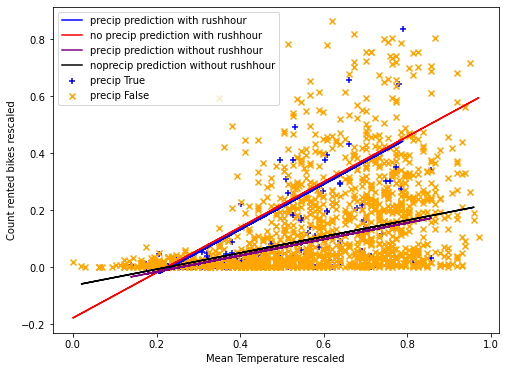

In [17]:
plot_ml_regression_v2(df_boston_re[df_boston_re["rushhour"]==1],df_boston_re[df_boston_re["rushhour"]==0], "precip", "rushhour")

This plot shows the diffrence between rushhour and not rushhour. As you can see through the red and blue line the demand during rushhour is higher than during other times, even if its raining. The black and purple line display the demand if its raining while it isn't rushhour. It can also be seen thar the black and purple pretty similar, showing that the demand dosen't really differs if precip is factor or not. 


(But if its raining in the demand during rushhour is less. A plausible assumption could be people coumutting to work/home with diffrent methods. )


[[0.44374466 0.0128999 ]] [-0.10300864]
Mean absolute error for factor precip True + season True: 0.09
Mean absolute error for factor precip False + season True: 0.13
[[ 0.35482675 -0.03376658]] [-0.07267549]
Mean absolute error for factor precip True + season False: 0.05
Mean absolute error for factor precip False + season False: 0.10


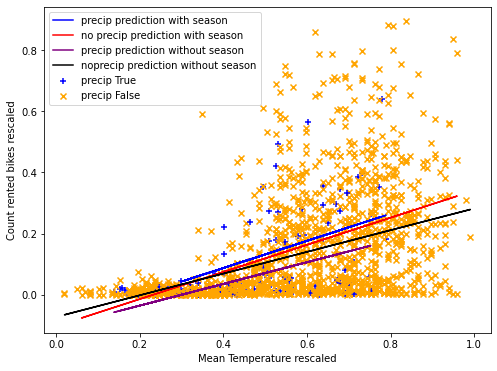

In [18]:
plot_ml_regression_v2(df_boston_re[df_boston_re["season"]<=2],df_boston_re[df_boston_re["season"]>=3], "precip", "season")

It can be observed that the red line, which represents the demand during winter and spring without precip, is parallel and above to the blue one, which shows the same months, but with precip. On the other hand during summer and antumn the factor precip dosen't matter at all.

[[0.43286978 0.2112121 ]] [-0.14662227]
Mean absolute error for factor rushhour True + season True: 0.18
Mean absolute error for factor rushhour False + season True: 0.09
[[0.36665467 0.1431849 ]] [-0.11738268]
Mean absolute error for factor rushhour True + season False: 0.15
Mean absolute error for factor rushhour False + season False: 0.07


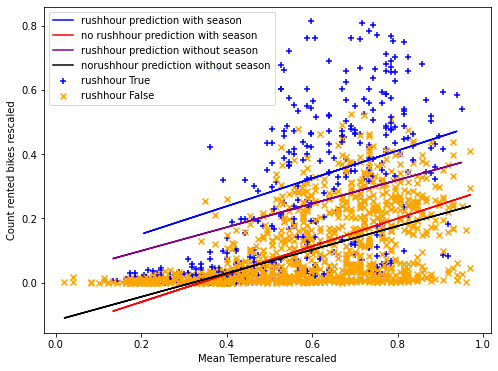

In [19]:
plot_ml_regression_v2(df_boston_re[df_boston_re["season"]<=2],df_boston_re[df_boston_re["season"]>=3], "rushhour", "season")

The plot shows that the factor rushhour has a greater degree of influence. In both peroids rushhour causes people to rent much more bikes, especially during summer and autumn there is a big difference.



As you can see the plot is really clusterd and not well readable. The information is also not that usefull to us ,because these 4 lines represent just the plot_ml_regression function with 2 diffrent categories combined in one plot.

People rent bikes more frequently in the summer and less in winter.

[[0.37126232 0.14298721]] [-0.11884603]
Mean absolute error for factor rushhour True: 0.14
Mean absolute error for factor rushhour False: 0.07


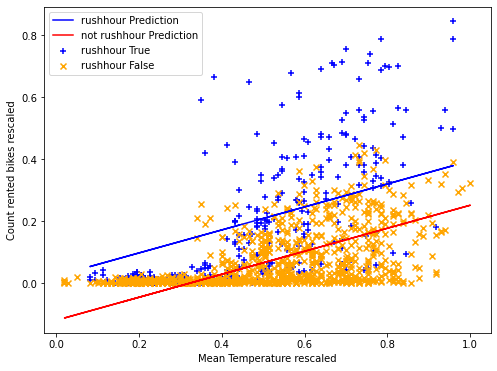

In [20]:
plot_ml_regression(df_boston_re[df_boston_re["season"]>=3], "rushhour")

[[0.44971005 0.20813734]] [-0.15705733]
Mean absolute error for factor rushhour True: 0.18
Mean absolute error for factor rushhour False: 0.09


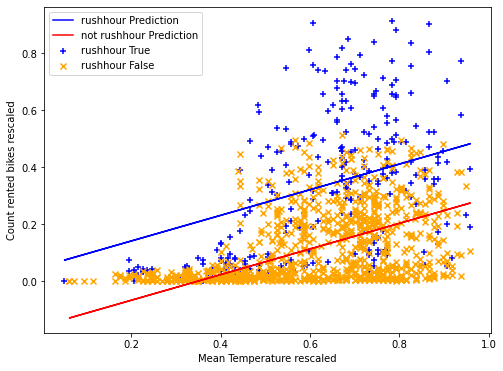

In [21]:
plot_ml_regression(df_boston_re[df_boston_re["season"]<=2], "rushhour")

The plots show again that during summer, autumn and winter, spring people rent bikes less frequently when it isnt rushhour, but in summer, autumn it has a far larger effect.

### Using multi-linear-regression the predict the demand with different conditions

In [40]:
def predict_on_info(df, fe, inf):
    #creating of test and predict set
    df_train,df_test=train_test_split(df, test_size=0.3)
    b=(inf[0]-min(df_boston["mean_temp"]))/(max(df_boston["mean_temp"])-min(df_boston["mean_temp"]))
    inf[0]=b
    reg = LinearRegression()
    reg.fit(df_train[fe],df_train[["count"]])
    y_pred=reg.predict(df_test[fe])
    print('Coefficients: \n', reg.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
      % mean_squared_error(df_test[["count"]], y_pred))
    print('Mean absolute Error: %.2f'
      % mean_absolute_error(df_test[["count"]], y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
      % r2_score(df_test[["count"]], y_pred))
    a=float(str(reg.predict([inf]))[2:-2])*(max(df_boston["count"])-min(df_boston["count"]))+min(df_boston["count"])
    print("\\n\\nWith "+str(fe)+ " Parameters we get: "+str(a) +" Rides.")


The method above is for predicting, with given factors, the propable demand of bikes when these conditions occur. It also calulates and dispays other informaton like the Coefficients of the function, Mean squared error, Mean absolute Error and Coefficient of determination.     
First it splits the Dataset into a test set (70% of the data) and a holdout set (30% of the data). Than it converts the given re-sized Dataframe back into its orinal values. At last it returns all the listed information.

In [41]:
predict_on_info(df_boston_re,["mean_temp", "rushhour", "precip","summer"],[20,1,0,1])

Coefficients: 
 [[ 0.35596175  0.17638393 -0.01172852  0.04520137]]
Mean squared error: 0.02
Mean absolute Error: 0.10
Coefficient of determination: 0.40
\n\nWith ['mean_temp', 'rushhour', 'precip', 'summer'] Parameters we get: 341.7882971 Rides.


This means that with 20°C in rushhour without rain in the summer, we can expect a demand of about 336 bikes. Even with small error.

# Poly Regression

In [24]:
def plot_regression_poly(x, y, d):
    
    # Create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    # create scaled test dataset
    xt = 2* (xt0 - min_x)/(max_x - min_x) -1
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T
    yt = Xt @ theta
    
    # Plot results
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:7]) # prints first 3 thetas<

[ 460.16721492   73.48439947 -569.78190287   -4.12482595  313.60002283
  100.49121938]


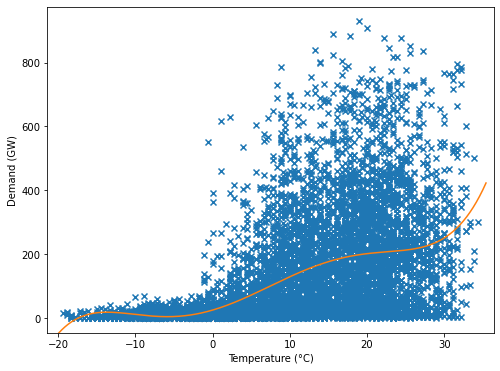

In [25]:
plot_regression_poly(df_boston["mean_temp"].values,df_boston["count"].values,5)

To reduce the overplotting, we will only take each 50 value from the dataset

In [26]:
df_boston_skip=df_boston.copy()
df_boston_skip=df_boston_skip[::30]

[ -80.1287048  -153.43942834 -101.14496097  247.68240792  416.72678645
  166.10723359]


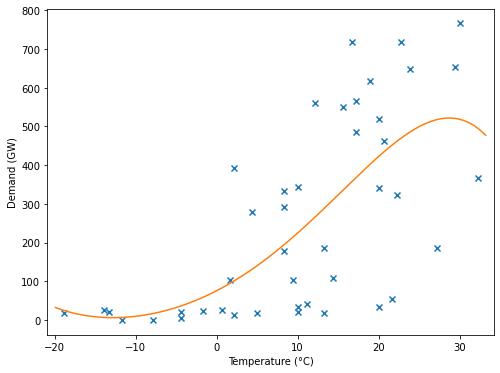

In [27]:
plot_regression_poly(df_test["mean_temp"].values,df_test["count"].values,5)

When its getting warmer more people are likely to rent bikes.

In [28]:
Q = np.array([[2,3,4], [5,6,7]])

#initialize PolynomialFeatures
PF = PolynomialFeatures(degree = 4,interaction_only = False, include_bias = True)
Q_Poly = PF.fit_transform(Q.reshape(-1,1))
print(Q_Poly)

[[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]]


In [29]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

The R^2 for quadratic curve is:  0.22844910063820367


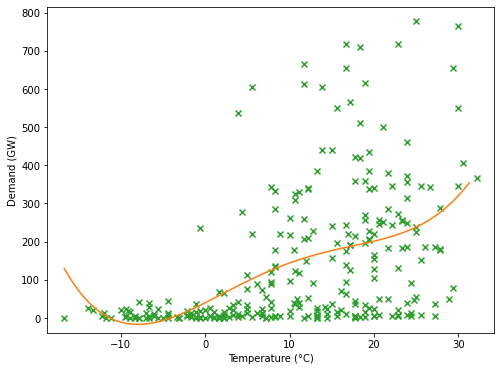

In [30]:
plot_regression_poly_scikit(X = df_boston_skip["mean_temp"].values, Y = df_boston_skip["count"].values, d = 4)

In [31]:
def creating_set(df):
    # create an array
    X = df["mean_temp"]

    # create randomly shuffled list of indexes 
    np.random.seed(10) # This method is called when RandomState is initialized
    perm = np.random.permutation(len(X))

    # select first 70% indexes of shuffled list as train set
    idx_train = perm[:int(len(perm)*0.7)]

    # select last 30% indexes of shuffled list as train set
    idx_cv = perm[int(len(perm)*0.7):]

    x_train, y_train = df["mean_temp"].iloc[idx_train].values, df["count"].iloc[idx_train].values
    x_cv, y_cv = df["mean_temp"].iloc[idx_cv].values, df["count"].iloc[idx_cv].values
    plt.figure(figsize = (8,6))
    plt.scatter(x_train, y_train, marker='x', color="C0")
    plt.scatter(x_cv, y_cv, marker='x', color="C2")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.legend(['Training set', 'Holdout set'])
    plt.show()
    #plt.savefig('crossvalidation.png', dpi = 300)

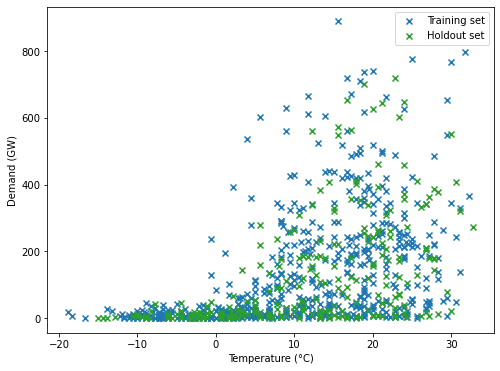

In [32]:
creating_set(df_boston[::10])

The R^2 for quadratic curve is:  0.4360783010657898


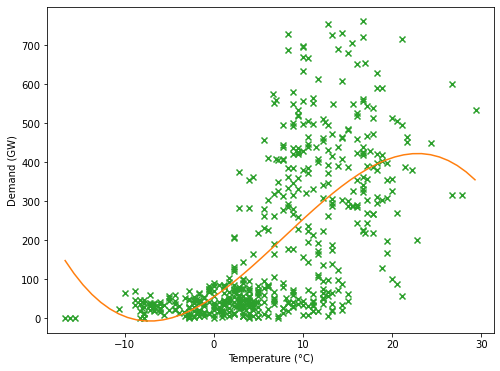

In [33]:
plot_regression_poly_scikit(X = df_boston[(df_boston["spring"]==1)&(df_boston["rushhour"]==1)]["mean_temp"].values, Y = df_boston[(df_boston["spring"]==1)&(df_boston["rushhour"]==1)]["count"].values, d =3)

The R^2 for quadratic curve is:  0.019650842147241887


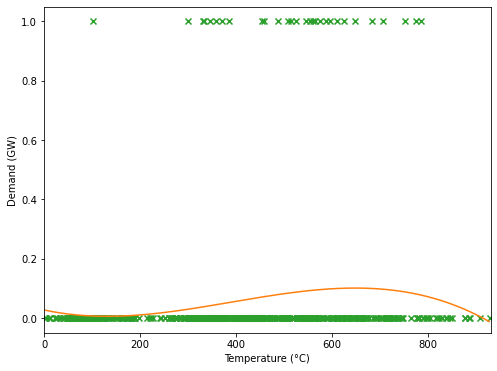

In [34]:
plot_regression_poly_scikit(X = df_boston[(df_boston["summer"]==1)&(df_boston["rushhour"]==1)]["count"].values, Y = df_boston[(df_boston["summer"]==1)&(df_boston["rushhour"]==1)]["precip"].values, d =3)

The R^2 for quadratic curve is:  0.2299287880204387


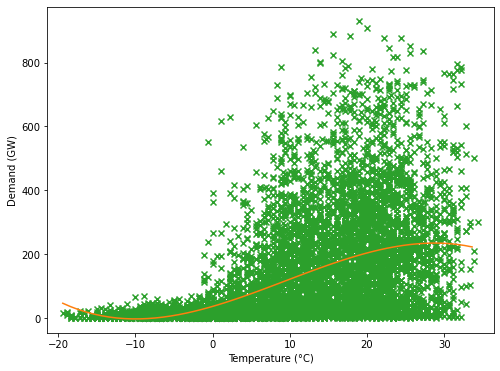

In [35]:
plot_regression_poly_scikit(df_boston["mean_temp"].values,df_boston["count"].values,3)

In [36]:
df_boston

,start_time,count,mean_temp,precip,spring,summer,autumn,winter,rushhour,weekday,season,hour
6,2015-01-01 06:00:00,0,-5.6,0,0,0,0,1,0,1,4,6
7,2015-01-01 07:00:00,0,-5.6,0,0,0,0,1,1,1,4,7
8,2015-01-01 08:00:00,4,-5.6,0,0,0,0,1,1,1,4,8
9,2015-01-01 09:00:00,2,-4.4,0,0,0,0,1,1,1,4,9
10,2015-01-01 10:00:00,8,-5.6,0,0,0,0,1,0,1,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2015-12-31 19:00:00,26,11.7,0,0,0,0,1,0,1,4,19
8756,2015-12-31 20:00:00,10,11.1,0,0,0,0,1,0,1,4,20
8757,2015-12-31 21:00:00,22,10.6,0,0,0,0,1,0,1,4,21
8758,2015-12-31 22:00:00,18,10.0,0,0,0,0,1,0,1,4,22


<AxesSubplot:xlabel='mean_temp', ylabel='count'>

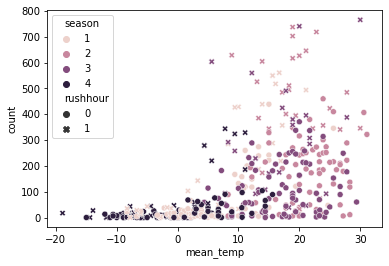

In [37]:
sns.scatterplot(data=df_boston[::20], x='mean_temp', y='count',hue="season", style="rushhour")

### Looking for diffrence in first 2 seasons of the year and then last 2 seasons of the year

The R^2 for quadratic curve is:  0.2496343979785537


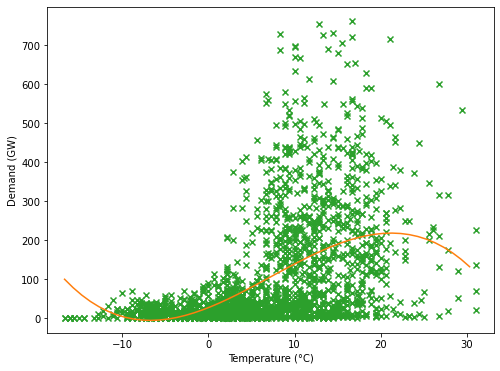

In [38]:
plot_regression_poly_scikit(df_boston[df_boston["season"]<2]["mean_temp"].values,df_boston[df_boston["season"]<2]["count"].values, 3)

The R^2 for quadratic curve is:  0.2545010192516284


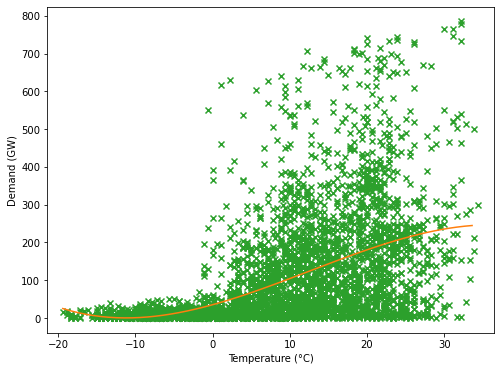

In [39]:
plot_regression_poly_scikit(df_boston[df_boston["season"]>2]["mean_temp"].values,df_boston[df_boston["season"]>2]["count"].values, 3)

As you can see there are more rented bikes in the last seasons (summer, autumn) with increasing numbers when its getting warmer